# Скорость сходимости метода ньютона
## Постановка задачи
Применить метод Ньютона scipy.optimize.newton к решению каждого из уравнений $(x-1)^{2}=0$. и $e^{2x}-2e^{x}+1=0$. Показать экспериментально(построить график зависимости ошибки от номера шага), что итерации сходятся линейно, а не квадратично. Попробовать доказать это теоретически.

## Экспериментальная часть

Подключим необходимые библиотеки:

In [1]:
import numpy as np 
from scipy import optimize 
import matplotlib.pyplot as plt 
import math

Создадим наши функции и их производные, также добавим в функции сохранение значений при каждом обращении к ним:

In [18]:
def f(x): 
    x_add.append(x)
    return (x-1)**2
def f1(x): 
    x_add.append(x)
    return pow(math.exp(1),2*x)-2*pow(math.exp(1),x)+1

def fprime(x):
    return 2*x-2
def f1prime(x):
    return 2*math.exp(1)**x*((math.exp(1)**x)-1)

Возьмем нужный нам метод из библиотеки scipy:

In [11]:
from scipy.optimize import newton

Применим метод Ньютона к нашим функциям:

In [20]:
x_add = []
x0 = newton(f, 3, fprime=fprime)
x_add.append(x0)
x_newton = x_add

In [58]:
x_add = []
x0 = newton(f1, 3, fprime=f1prime)
x_add.append(x0)
x_newton1 = x_add

Построим графики:

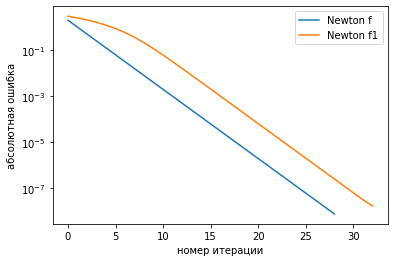

In [54]:
plt.semilogy(np.abs(np.array(x_newton) - 1), label='Newton f')
plt.semilogy(np.abs(np.array(x_newton1) - 0), label='Newton f1')
plt.xlabel('номер итерации')
plt.ylabel('абсолютная ошибка')
plt.legend()
pass

Мы видим, что в логарифмическом масштабе первый график является четкой прямой, а второй в некотором приблежении прямой, это значит, что сходимость с линейной скоростью или со скоростью геометрической прогрессии другими словами. Важно заметить, что начальным приблежением для второй функции должно быть положительное число, минимальное число при котором ячейка не уходит в ошибку это минус три, в теоретической части есть объяснение этому.

## Теоретическая часть

Экспериментально мы доказали, что итерации сходятся в обоих этих уравнениях сходятся линейно, а не квадратично. Теперь попробуем доказать это теоретически.

Теорема о сходимости метода Ньютона
Пусть корень уравнения f(x) = 0 отделен на отрезке $[a;b]$ (функция f(x) непрерывна на $[a;b]$ и на концах его принимает разные знаки), а производные $f'(x)$ и $f''(x)$ отличны от нуля и сохраняют постоянные знаки на $[a;b]$. Тогда, если выбрать начальное приближение х0 $[a;b]$ так, чтобы $f'(x0) ∙ f''(x0) $>$ 0$, то последовательность приближений, определяемая формулой$$
x_{n}=x_{n-1}-\frac{f(x_{n-1})}{f'(x_{n-1})}
$$сходится. Вычислим скорость сходимости для каждого их уравнений$$(x-1)^{2}=0$$и$$e^{2x}-2e^{x}+1=0$$Скорость сходимости-степень приближения к точному решению на каждой итерации.
## Для первого уравнения:
$$f(x)=(x-1)^{2}$$
$$f'(x)=2x-2$$
$$x-\frac{f(x)}{f'(x)}=x-\frac{(x-1)^{2}}{(2x-2)}=\frac{(x-1)}{2}$$
Эта функция линейна, а значит и итерации сходятся линейно.

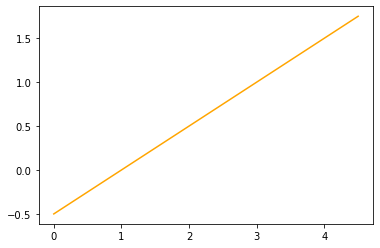

In [44]:
import numpy as np 
import math
import matplotlib.pyplot as plt
%matplotlib inline

y=[]
x=np.arange(0,5,0.5)
def f(x): 
    return (x-1)/2 
for x1 in x:
    y.append(f(x1))

plt.plot(x,y,'orange')  
pass

## Для второго уравненя:
$$f(x)=e^{2x}-2e^{x}+1$$
$$f'(x)=2e^{2x}-2e^{x}$$
$$x-\frac{f(x)}{f'(x)}=x-\frac{(e^{2x}-2e^{x}+1)}{(2e^{2x}-2e^{x})}=x+0.5\frac{1}{e^{x}}-\frac{1}{2}$$
По графику видно, что функция сходимости линейна в интервале {0,${\infty}$}.

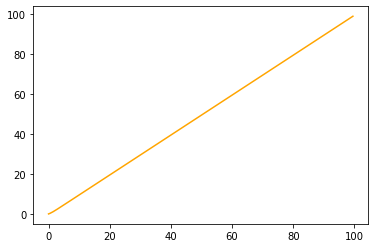

In [43]:
import numpy as np 
import math
import matplotlib.pyplot as plt
%matplotlib inline

y=[]
x=np.arange(0,100,0.5)
def f(x): 
    return x+0.5*pow(math.exp(1),-x)-0.5
for x1 in x:
    y.append(f(x1))

plt.plot(x,y,'orange')    
pass

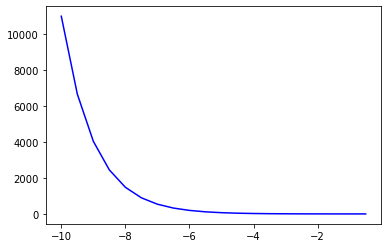

In [46]:
import numpy as np 
import math
import matplotlib.pyplot as plt
%matplotlib inline

y=[]
x=np.arange(-10,0,0.5)
def f(x): 
    return x+0.5*pow(math.exp(1),-x)-0.5
for x1 in x:
    y.append(f(x1))

plt.plot(x,y,'blue')    
pass

## Вывод
Доказали теоретически и экспериментально, что ошибка с номером итерации в первом и во втором случае сходятся линейно, но во втором случае с некоторыми оговорками по области значений функции.